In [1]:
import pandas as pd


file_path = r"C:\Users\divaa\OneDrive\Desktop\pri\Bliend\Bliend dataset\Mall_Customers.csv"
df = pd.read_csv(file_path)


df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
# Check for missing values
df.isnull().sum()



CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [44]:
# Check for duplicate records
df.duplicated().sum()



0

In [45]:

df.dtypes


CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [46]:

df.describe()

df['Gender'].value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

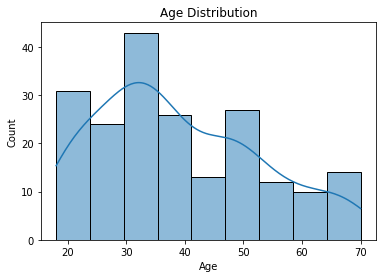

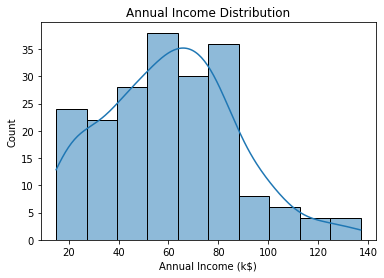

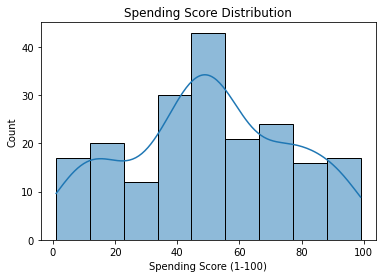

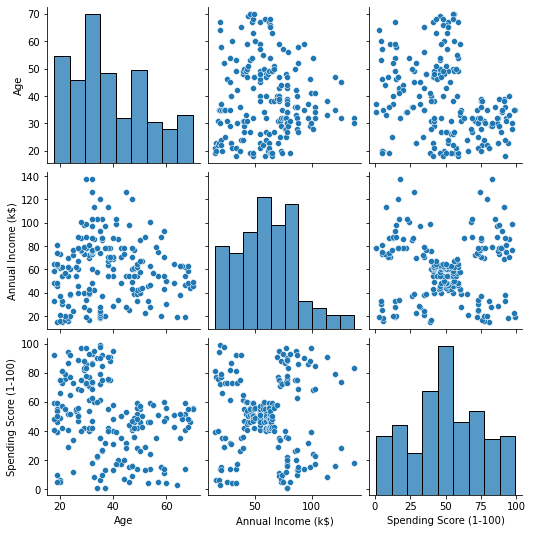

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots for numerical columns
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(df['Annual Income (k$)'], kde=True)
plt.title('Annual Income Distribution')
plt.show()

sns.histplot(df['Spending Score (1-100)'], kde=True)
plt.title('Spending Score Distribution')
plt.show()

# Pairplot to visualize relationships between features
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()


In [48]:

df.isnull().sum()


df = df.drop_duplicates()

df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


In [49]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]


In [50]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\divaa\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


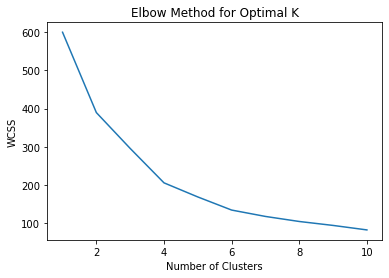

In [51]:
from sklearn.cluster import KMeans
wcss = []  

for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)


plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [52]:

kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
df['Cluster'] = kmeans.fit_predict(X_scaled)


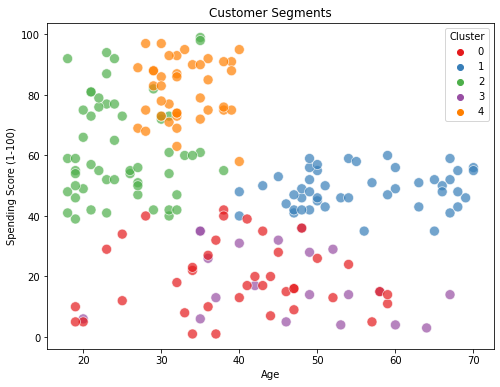

In [53]:

plt.figure(figsize=(8, 6))
sns.scatterplot(x=df['Age'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100, alpha=0.7)
plt.title('Customer Segments')
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.show()


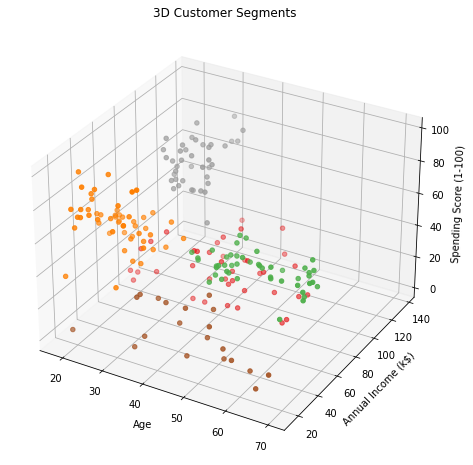

In [54]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['Age'], df['Annual Income (k$)'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='Set1')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
plt.title('3D Customer Segments')
plt.show()


In [55]:
df.groupby('Cluster').mean()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,159.743590,0.487179,39.871795,86.102564,19.358974
1,83.872340,0.574468,55.638298,54.382979,48.851064
2,55.648148,0.592593,25.185185,41.092593,62.240741
3,24.100000,0.600000,46.250000,26.750000,18.350000
4,161.025000,0.550000,32.875000,86.100000,81.525000


Conclusion

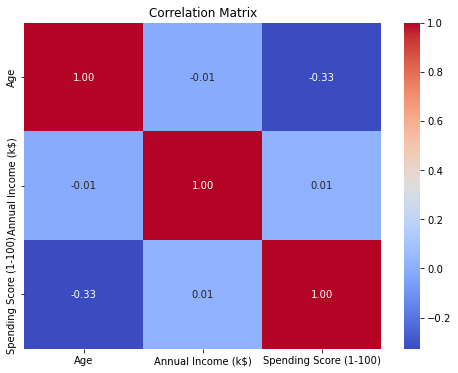

In [56]:
# Correlation matrix
correlation_matrix = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].corr()


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Matrix')
plt.show()


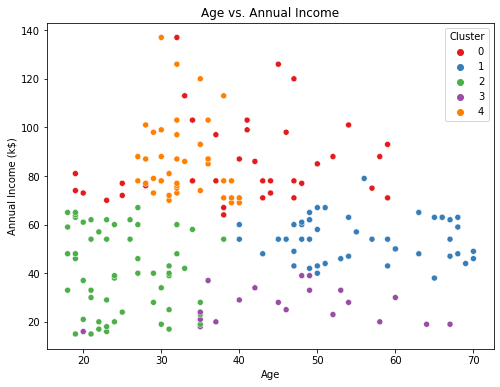

In [57]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Annual Income (k$)', data=df, hue='Cluster', palette='Set1')
plt.title('Age vs. Annual Income')
plt.show()


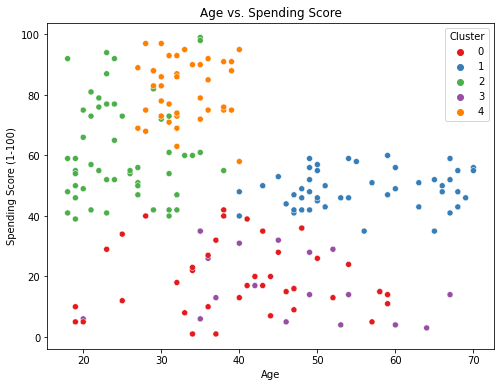

In [58]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Spending Score (1-100)', data=df, hue='Cluster', palette='Set1')
plt.title('Age vs. Spending Score')
plt.show()


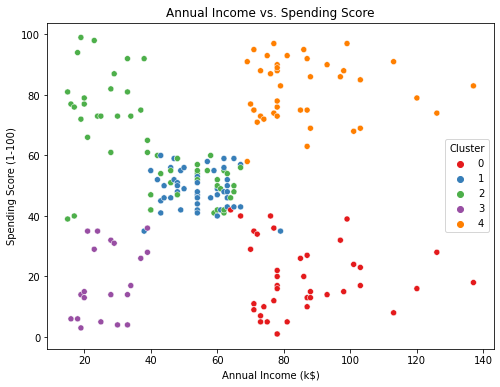

In [59]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', data=df, hue='Cluster', palette='Set1')
plt.title('Annual Income vs. Spending Score')
plt.show()


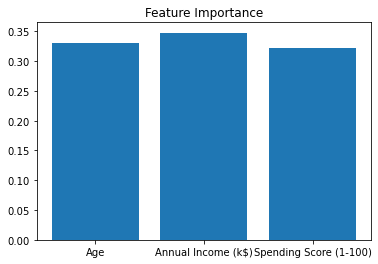

In [60]:
from sklearn.ensemble import RandomForestClassifier

'
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
y = df['Cluster']

# Fit Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_

# Plot feature importances
plt.bar(X.columns, importances)
plt.title('Feature Importance')
plt.show()


                             Age  Annual Income (k$)  Spending Score (1-100)
Age                     1.000000           -0.012398               -0.327227
Annual Income (k$)     -0.012398            1.000000                0.009903
Spending Score (1-100) -0.327227            0.009903                1.000000


In [62]:
from sklearn.linear_model import LinearRegression

# Prepare data (features and target variable)
X = df[['Age', 'Annual Income (k$)']]  # Independent variables
y = df['Spending Score (1-100)']  # Target variable

# Fit the model
regressor = LinearRegression()
regressor.fit(X, y)

# Output coefficients and intercept
print(f"Coefficient for Age: {regressor.coef_[0]}")
print(f"Coefficient for Income: {regressor.coef_[1]}")
print(f"Intercept: {regressor.intercept_}")


Coefficient for Age: -0.6047872578754504
Coefficient for Income: 0.005748559223865298
Intercept: 73.34785222186397


In [2]:
conda remove geopandas


Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are missing from the target environment:
  - geopandas




In [3]:
conda remove pycountry plotly


Solving environment: ...working... failed

Note: you may need to restart the kernel to use updated packages.



PackagesNotFoundError: The following packages are missing from the target environment:
  - pycountry


